<a href="https://colab.research.google.com/github/marco-finger/derLauch/blob/main/05_Numpy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has been provided by G. Witz, University of Bern

# 5. Numpy arrays

We have seen in a previous notebook that the objects underlying the complex DataFrames are Numpy arrays. Why do we need this additional container and why can't we just use Python lists ?

Let's imagine we have a list containing weights in gramms:

In [1]:
gramms = [5400, 3491, 2591, 14100]

Now we want to transform this list into kilogramms. We don't have any other choice than using a for loop (or a comprehension list) to divide each element by 1000:

In [2]:
kilogramms = []
for i in range(len(gramms)):
  new_value = gramms[i]/1000
  kilogramms.append(new_value)
kilogramms

[5.4, 3.491, 2.591, 14.1]

You can imagine much more complex cases, e.g. where we mix multiple lists, that makes this writing cumbersome and slow. What arrays provide us is **vectorized** computations.

## Creating an array

To see how this works , let's create a Numpy array (without extracting it from a DataFrame). First of all, let's import Numpy.

In [3]:
import numpy as np

We can easily turn our previous list into an array using the ```np.array``` function:

In [4]:
gramms_array = np.array(gramms)
gramms_array

array([ 5400,  3491,  2591, 14100])

**Vectorization** means now that we can operate on the list as **one object**, i.e. we can do mathematics with it as with a single number. In our example:

In [7]:
kilogramms_array = gramms_array / 1000
kilogramms_array

array([ 5.4  ,  3.491,  2.591, 14.1  ])

As mentioned above, this also works if we need to performe a computation which uses multiple arrays. Let's imagine we have a list of price/$m^2$ and surface for a series of appartments:

In [10]:
price_per_m2 = [6, 10.3, 12.4, 10.6, 5.7, 4.3, 14, 0.5, 0.5, 17.8, 12.7, 16, 2.7, 17.5, 5.2, 7.1, 1.2, 7.2, 14.5, 11.9]
surface = [238, 239, 265, 212, 143, 132, 142, 133, 109, 291, 225, 165, 141, 197, 298, 289, 123,  90, 132, 203]
len(price_per_m2) == len(surface) # check for equal array size

True

Now if we want to calculate the price of the apartment, we can just multiply each price/$m^2$ by the surface. We can do that by creating a for loop and filling a new list with the values:

In [11]:
price = []
for i in range(len(price_per_m2)):
  current_price = price_per_m2[i] * surface[i]
  price.append(current_price)

In [13]:
# price

Again we transform the two lists into arrays:

In [14]:
price_per_m2_array = np.array(price_per_m2)
surface_array = np.array(surface)

Instead of having to write a foor loop, Numpy allows us now to just use a standard mathemetical operation where we multiply the two arrays:

In [15]:
price_array = price_per_m2_array * surface_array
print(price_array)

[1428.  2461.7 3286.  2247.2  815.1  567.6 1988.    66.5   54.5 5179.8
 2857.5 2640.   380.7 3447.5 1549.6 2051.9  147.6  648.  1914.  2415.7]


You see that when multiplying two arrays, **Numpy simply multiplies each element of one array by the equivalent element of the other array**.

## Advantages of vectorization
There are two main advantages to this approach. First it makes the code much **simpler**: we achieved in a single line, what took an entire for loop with simples lists (there are slightly more efficient ways to do that even in plain Python via comprehension lists).

Second, it makes our code run much **faster**. When we do a for loop, each operation is done separately, and since Python is dynamically typed (you don't have to say whether a variable is text or numbers) it has to repeatedly carry out verifications. In the Numpy vectorized version, all multiplications can be done **in parallel** because: 1) the array contains only one type of variables so that no controls have to be done and 2) arrays are efficiently stored as blocks in memory so that individual values don't have to be "searched" for.

With this very simple example, we can compare the execution time using the magic command ```%%timeit```:

In [16]:
%%timeit -n 10000 -r 5 
price = []
for i in range(len(price_per_m2)):
  current_price = price_per_m2[i] * surface[i]
  price.append(current_price)

10000 loops, best of 5: 4.14 µs per loop


In [17]:
%%timeit -n 10000 -r 5
price_array = price_per_m2_array * surface_array

10000 loops, best of 5: 993 ns per loop


## Array type

We have mentioned above that computation is fast because the type of the arrays is known. This means that **all the elements of an array** must have the same type. Numpy implements its own types called ```dtype```. We can access to the type of an array using this:

In [18]:
price_per_m2_array

array([ 6. , 10.3, 12.4, 10.6,  5.7,  4.3, 14. ,  0.5,  0.5, 17.8, 12.7,
       16. ,  2.7, 17.5,  5.2,  7.1,  1.2,  7.2, 14.5, 11.9])

In [19]:
price_per_m2_array.dtype

dtype('float64')

We see that by default Numpy decided that the price had ```float64``` dtype because the numbers we used had a comma. Notice it also turned the numbers that **didn't** have a comma into floats (like the first element ```6```). Since all elements of an array need to have the same type, Numpy just selects the **most complex one** for the entire array.

Let's see what ```dtype``` the surface array has:

In [20]:
surface_array.dtype

dtype('int64')

We **only** used integerer numbers in that list, and therefore Numpy can use a "simpler" ```dtype``` for that array.

Finally let's see the result of our multiplication:

In [21]:
price_array.dtype

dtype('float64')

When combining multiple arrays, Numpy always **selects** the most complex ```dtype``` for the output.

If needed we can also change the ```dtype``` of an array explicitly using the ```as_type``` method. For example if we want our ```surface_array``` to be a float instead of an integer we can write:

In [22]:
surface_array_float = surface_array.astype(np.float64)

In [23]:
surface_array_float.dtype

dtype('float64')

Notice how we had to create a **new** array: most operations on Numpy arrays are **not done in place** i.e. the array itsels is not changed.

## Back to Pandas

Before we explore a bit further Numpy arrays and the operations we can apply on them, let's briefly come back to our Pandas DataFrame. We will use a simpler table that is also available online [here](https://github.com/guiwitz/NumpyPandas_course/blob/master/Data/composers.xlsx). Notice that this is this time really an Excel sheet, so we use the ```read_excel``` function:

In [24]:
import pandas as pd

composers = pd.read_excel('https://github.com/guiwitz/NumpyPandas_course/blob/master/Data/composers.xlsx?raw=true')
composers

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


Let's look at the birth column:

In [25]:
composers['birth']

0    1860
1    1770
2    1858
3    1906
Name: birth, dtype: int64

We see that we here also get a ```dtype``` information, in this case int64, since the underlying data of the DataFrame are Numpy arrays.

Just like with Numpy arrays, we can explicitely ask for the ```dtype```:

In [29]:
print(composers['birth'].dtype)
print(composers['city'].dtype)
print(composers['composer'].dtype)

int64
object
object


And we can also change the ```dtype``` using ```astype()```. Here again, we need to **asign** the resulto the change to a new series or directly to the original DataFrame:

In [31]:
composers['birth'] = composers['birth'].astype(np.float64)

In [32]:
composers

,composer,birth,death,city
0,Mahler,1860.0,1911,Kaliste
1,Beethoven,1770.0,1827,Bonn
2,Puccini,1858.0,1924,Lucques
3,Shostakovich,1906.0,1975,Saint-Petersburg


In [34]:
composers['birth'].dtype

dtype('float64')

We immediately see that the numbers in the ```birth``` column have now a comma, and if we ask for the column type, we indeed get now a float.

## Exercise

1. Create an array with 3 elements and one with 5 elements containing integers
2. Try to multiply the two arrays.
3. You should get an error message. Do you understand the problem ? How can you fix it?
4. Change the ```dtype``` of the output to float32.
5. Import the file that you cand find here: https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv
6. Use ```head()``` to visualize a few lines
7. What's the type of the ```body_mass_g``` and ```year``` columns ?
8. Transform the type of the ```year``` column into a float

In [37]:
# array1 = np.array([2,6,0])
# array2 = np.array([4,3,6,1,7])
# print(array1 * array2)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
df = pd.read_csv(url)

In [50]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [53]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f180177e390>,
      dtype=object)

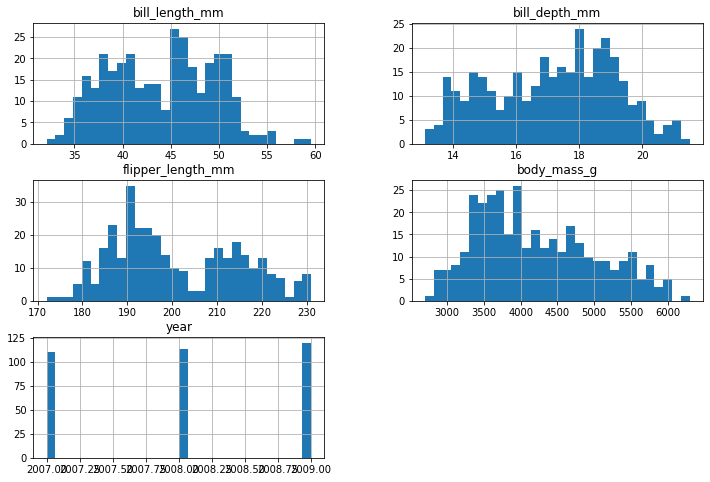

In [65]:
df.hist(bins=30, figsize=(12, 8))


In [71]:
print(df['body_mass_g'].dtype)
print(df['year'].dtype)


float64
int64


In [73]:
df['year'] = df['year'].astype(np.float64)
df['year'].dtype

dtype('float64')